In [9]:
from object_detection.utils import label_map_util, visualization_utils
import tensorflow as tf
import numpy as np
%matplotlib inline


In [10]:
MODEL_PATH = 'tuned_model'
PATH_TO_SAVED_MODEL = MODEL_PATH + '/saved_model'

detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

In [12]:
image_path = 'test_image_car.jpeg'

In [13]:
label_map_pbtxt_fname = 'label_map.pbxt'
category_index = label_map_util.create_category_index_from_labelmap(label_map_pbtxt_fname)

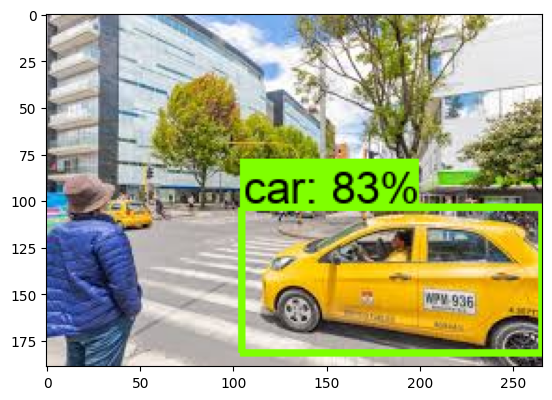

In [15]:
arr_image = np.array(Image.open(image_path))
tensor_image = tf.convert_to_tensor(arr_image)
tensor_image = tensor_image[tf.newaxis,...]
detections = detect_fn(tensor_image)


num_detections = int(detections.pop('num_detections'))
detections = {key:value[0, :num_detections].numpy() 
             for key, value in detections.items()
             }

detections['num_detections'] = num_detections

detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_np_with_detections = arr_image.copy()

visualization_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections['detection_boxes'],
    detections['detection_classes'],
    detections['detection_scores'],
    category_index,
    use_normalized_coordinates = True,
    max_boxes_to_draw = 200,
    min_score_thresh = 0.3
)
plt.imshow(image_np_with_detections)
plt.show()
